# Wine Quality Visualization

## Introduction:
* In the winemaking industry, the quality of wine is assessed through a series of physicochemical and sensory tests. Laboratory tests are often used to characterize wine from numerous aspects, while sensory tests are performed by human experts, relying on human senses. Human analysis can be a final test for the ultimate quality of a wine. Physicochemical and sensory analysis are complex and are still not fully understood, however, it may be reasonable to hypothesize that physicochemical properties have an impact on human judgment.

* Collected from May 2004 to February 2007, this dataset, winequality-red.csv, is related to the red variant of the Portuguese “Vinho Verde” wine. The dataset contains ten physicochemical properties of red wine: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. It also contains a human determined rating for quality for each sample, on a scale from (0-10).
 
With this project, we will try to answer the question: “Is the quality of red wine affected by its physicochemical properties?”


## Methods:
* We plan on answering our predictive question using a k-nearest neighbors classification model. We aim to generate a random point in the plot and observe its nearest neighbors to predict the Grade of red wine. 
* We start by loading the libraries and dataset. 
* After this, we will use GGPairs, Forward Selection and Box Plots to pick our predictors. 
* We will then plot our predictors and analyze a relation between them as well as Grade to also see whe5ther it is correct or not. 
* Lastly, we will use our classification model and get the accuracy of our model. 


### Reading the Libraries into JupyterHub

We will first start by loading the libraries we will be using in this project.

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(gridExtra)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

### Loading Our Dataset into JupyterHub

Now that we have the libraries, we can start by loading our data into R. We then add a new column using the mutate function to show the number of rows and use the select function to place our new column as the first column in the dataset.

In [2]:
dataset <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delim = ";") |>
           mutate(seq = seq(from = 1, to = 1599), na.rm = TRUE) |>
           select(13,1:12)
dataset

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


seq,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1597,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
1599,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


Table 1: Wine dataset

### Wrangling

This data is very difficult to work with so we will start by first cleaning and wrangling our dataset. We begin by selecting the columns we want using the select function, then renaming the columns to provide better column names for each. 
Lastly, we are creating a categorical dataset below by adding a new column using the mutate function which tells us that:
* Quality < 5 is Low
* Quality of 5 is Average
* Quality of 6 is High
* Quality of > 6 is Very High

We will use the function, as_factor(), to make it a categorical variable.

In [3]:
filtered_dataset <- dataset |>
                    select("seq", "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                           "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality")
                           
                         
colnames(filtered_dataset) <- (c("seq", "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
                           "chlorides", "free_sulfur_dioxide","total_sulfur_dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"))




categorical_dataset <- filtered_dataset |>
                       mutate(Grade = case_when(quality < 5 ~ "Low",
                                                quality == 5 ~ "Average", 
                                                quality == 6 ~ "High",
                                                quality > 6 ~ "Very High")) |>
                       mutate(Grade = as_factor(Grade)) |>
                        arrange(quality) 

categorical_dataset
                                               





seq,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Grade
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
460,11.6,0.580,0.66,2.20,0.074,10,47,1.0008,3.25,0.57,9.0,3,Low
518,10.4,0.610,0.49,2.10,0.200,5,16,0.9994,3.16,0.63,8.4,3,Low
691,7.4,1.185,0.00,4.25,0.097,5,14,0.9966,3.63,0.54,10.7,3,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1404,7.2,0.33,0.33,1.7,0.061,3,13,0.99600,3.23,1.10,10.0,8,Very High
1450,7.2,0.38,0.31,2.0,0.056,15,29,0.99472,3.23,0.76,11.3,8,Very High
1550,7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.4,8,Very High


Table 2: Modified Wine Dataset

## GGPairs

In order to find the correlation between our variables and the quality of wine, we will use the GGpairs function below:

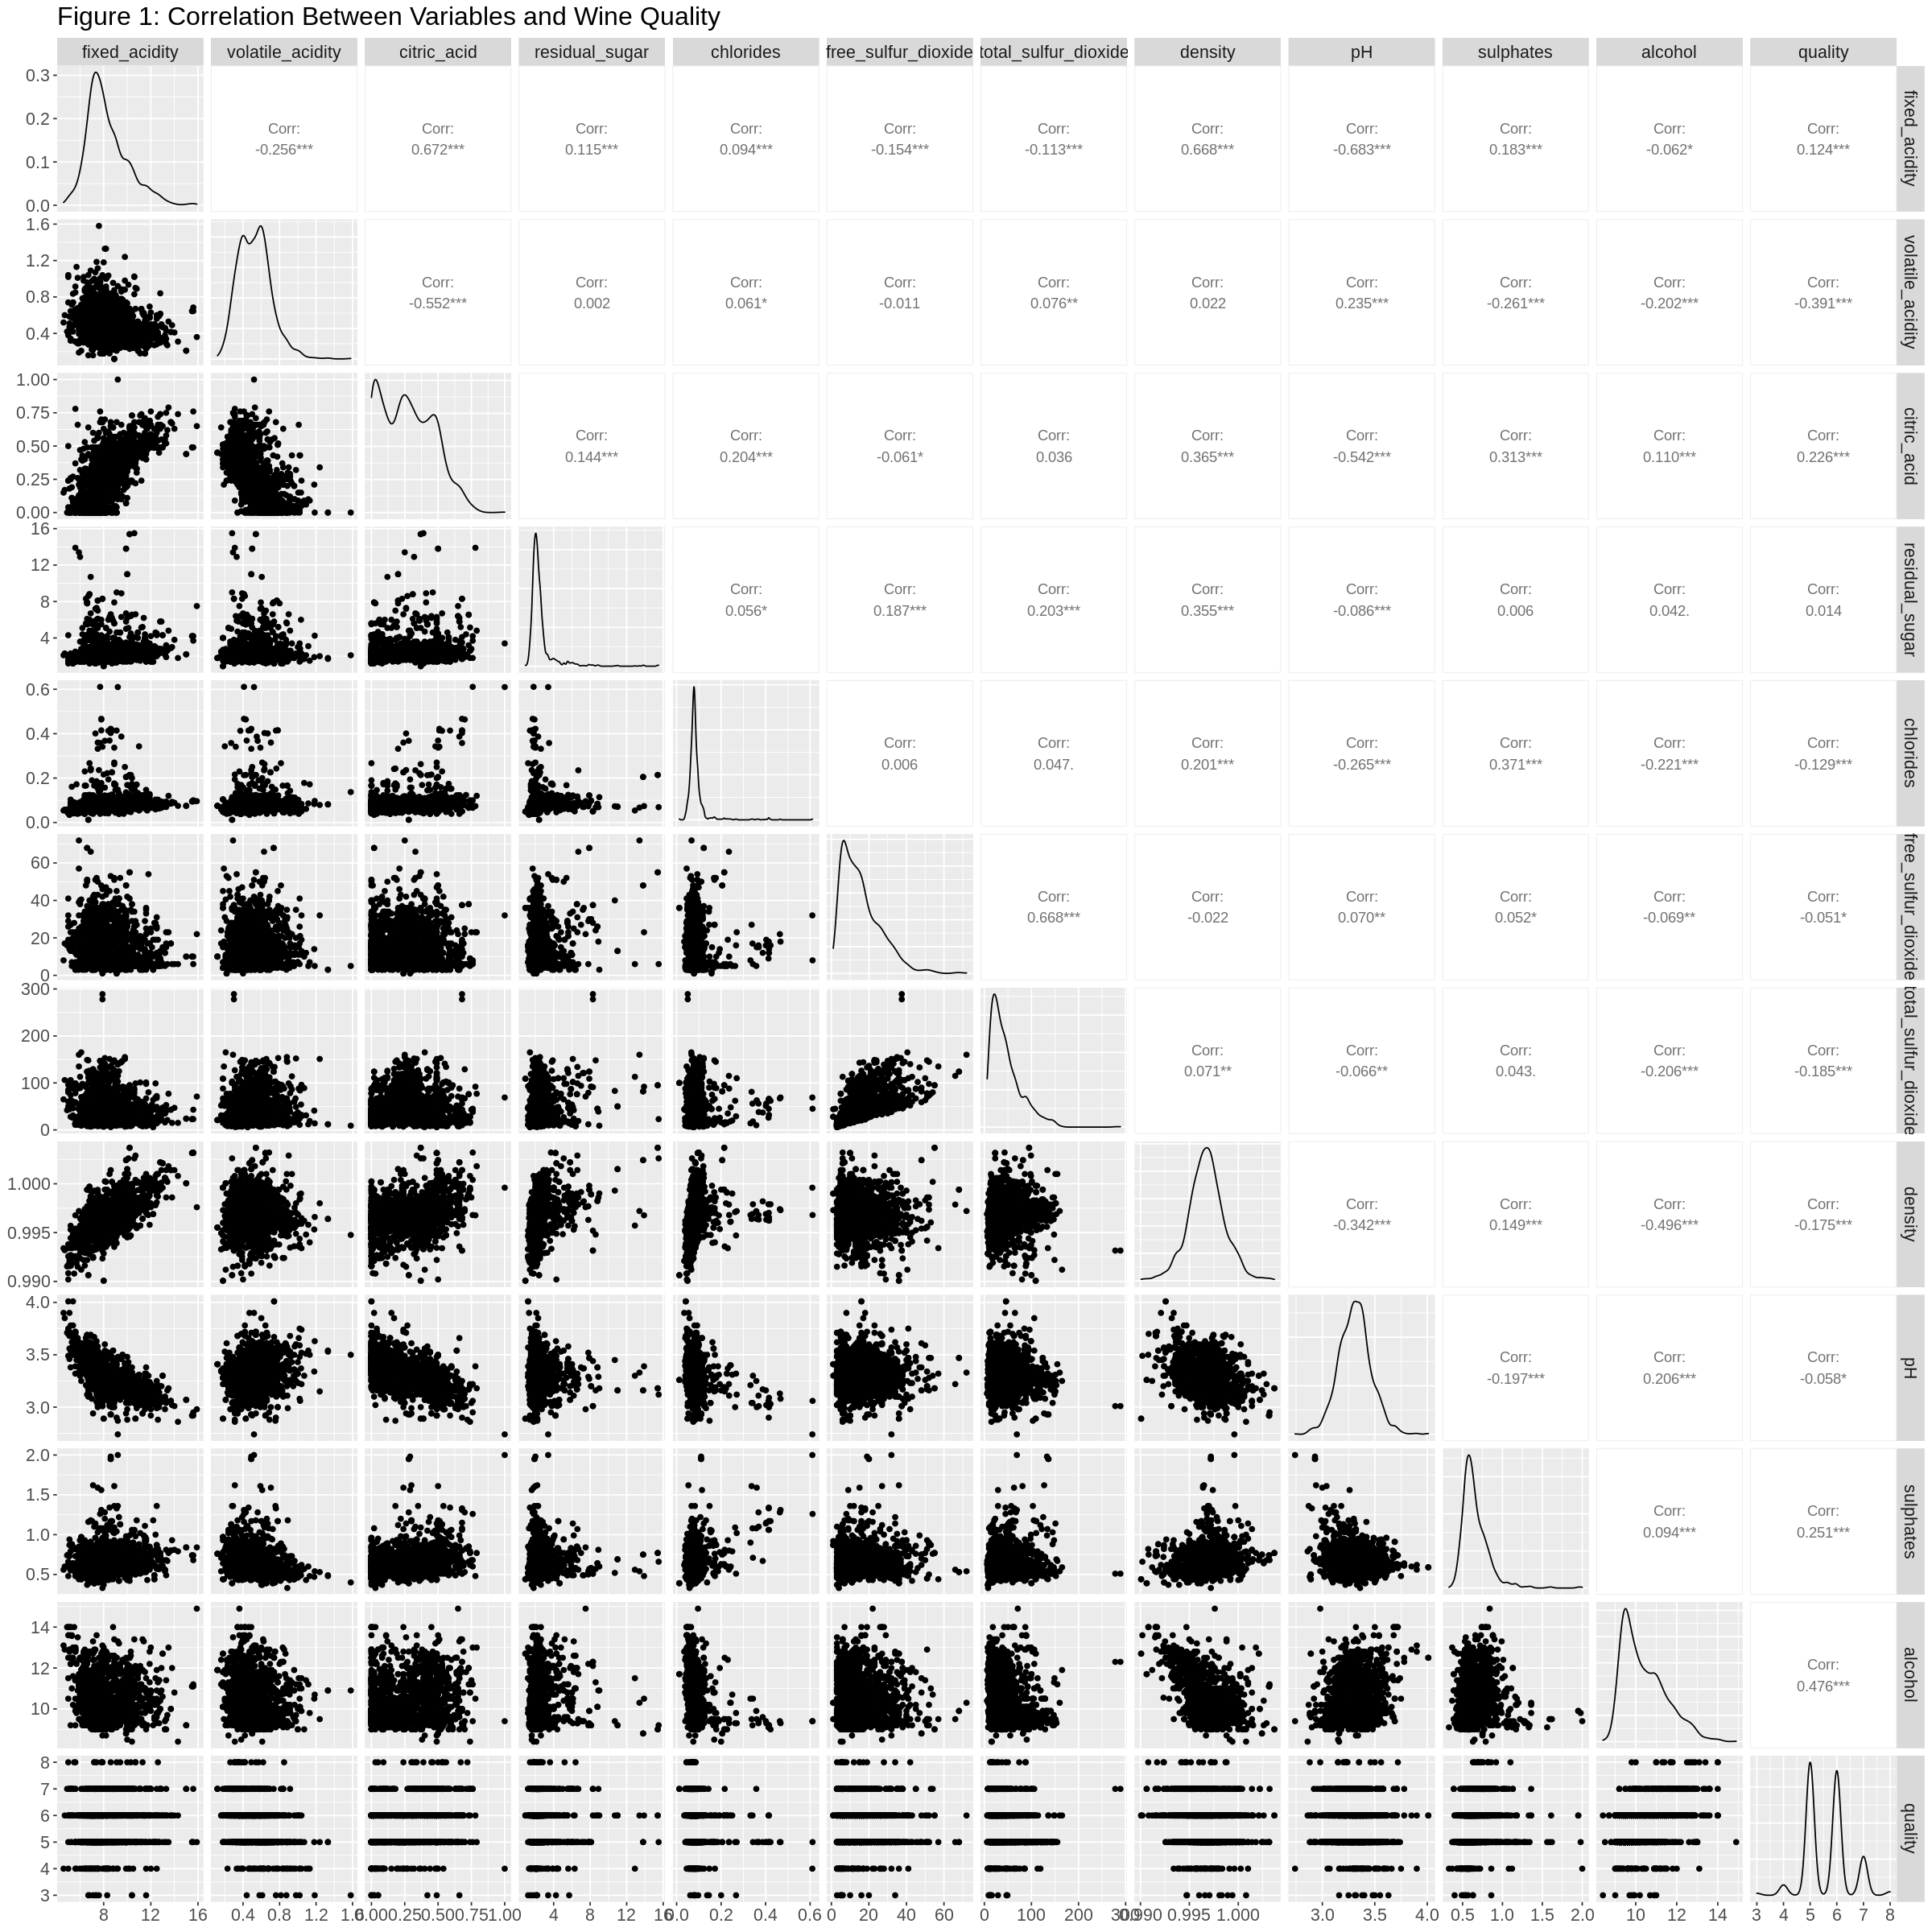

In [4]:
set.seed(1000)
options(repr.plot.width = 20, repr.plot.height = 20)

ggpairs <- ggpairs(categorical_dataset, columns = 2:13) + ggtitle("Figure 1: Correlation Between Variables and Wine Quality")+  
theme(text = element_text(size = 16)) 
ggpairs

In Figure 1 above, we can see that the variables with the largest correlaton to quality are volatile acidity and alcohol. Thus, we can use this to justify using these two variables as our predictors. 

In addition, we are also planning to utilize forward selection to observe which predictors will give us the best accuracy estimate.

### Removing The Outliers

With this current dataset, our visualizations will be very clustered, making it difficult to clearly see the correlation. Therefore, we will remove the outliers from our dataset as shown below using the Inter Quantile function.

In [5]:
#find Q1, Q3, and interquartile range for values in column sulphates
Q1 <- quantile(categorical_dataset$sulphates, .25)
Q3 <- quantile(categorical_dataset$sulphates, .75)
IQR <- IQR(categorical_dataset$sulphates)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers <- subset(categorical_dataset, categorical_dataset$sulphates> (Q1 - 1.5*IQR) 
                      & categorical_dataset$sulphates< (Q3 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers) 


#find Q4, Q6, and interquartile range for values in column citric_acid
Q4 <- quantile(no_outliers$citric_acid, .25)
Q6 <- quantile(no_outliers$citric_acid, .75)
IQR <- IQR(no_outliers$citric_acid)

#only keep rows in dataframe that have values within 1.5*IQR of Q4 and Q6
no_outliers_2 <- subset(no_outliers, no_outliers$citric_acid> (Q4 - 1.5*IQR) 
                      & no_outliers$citric_acid< (Q6 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_2) 

#find Q7, Q9, and interquartile range for values in column volatile_acidity
Q7 <- quantile(no_outliers_2$volatile_acidity, .25)
Q9 <- quantile(no_outliers_2$volatile_acidity, .75)
IQR <- IQR(no_outliers_2$volatile_acidity)

#only keep rows in dataframe that have values within 1.5*IQR of Q7 and Q9
no_outliers_3 <- subset(no_outliers_2, no_outliers_2$volatile_acidity> (Q7 - 1.5*IQR) 
                     & no_outliers_2$volatile_acidity< (Q9 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_3) 


#find Q11, Q13, and interquartile range for values in column alcohol
Q11 <- quantile(no_outliers_3$alcohol, .25)
Q13 <- quantile(no_outliers_3$alcohol, .75)
IQR <- IQR(no_outliers_3$alcohol)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_4 <- subset(no_outliers_3, no_outliers_3$alcohol> (Q11 - 1.5*IQR) 
                     & no_outliers_3$alcohol< (Q13 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_4) 

#find Q15, Q17, and interquartile range for values in column alcohol
Q15 <- quantile(no_outliers_4$fixed_acidity, .25)
Q17 <- quantile(no_outliers_4$fixed_acidity, .75)
IQR <- IQR(no_outliers_4$fixed_acidity)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_5 <- subset(no_outliers_4, no_outliers_4$fixed_acidity> (Q15 - 1.5*IQR) 
                     & no_outliers_4$fixed_acidity< (Q17 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_5) 


#find Q19, Q21, and interquartile range for values in column alcohol
Q19 <- quantile(no_outliers_5$chlorides, .25)
Q21 <- quantile(no_outliers_5$chlorides, .75)
IQR <- IQR(no_outliers_5$chlorides)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_6 <- subset(no_outliers_5, no_outliers_5$chlorides> (Q19 - 1.5*IQR) 
                     & no_outliers_5$chlorides< (Q21 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_6)

#find Q23, Q25, and interquartile range for values in column alcohol
Q23 <- quantile(no_outliers_6$free_sulfur_dioxide,.25)
Q25 <- quantile(no_outliers_6$free_sulfur_dioxide, .75)
IQR <- IQR(no_outliers_6$free_sulfur_dioxide)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_7 <- subset(no_outliers_6, no_outliers_6$free_sulfur_dioxide> (Q23 - 1.5*IQR) 
                     & no_outliers_6$free_sulfur_dioxide< (Q25 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_7)

#find Q27, Q29, and interquartile range for values in column alcohol
Q27 <- quantile(no_outliers_7$total_sulfur_dioxide,.25)
Q29 <- quantile(no_outliers_7$total_sulfur_dioxide, .75)
IQR <- IQR(no_outliers_7$total_sulfur_dioxide)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_8 <- subset(no_outliers_7, no_outliers_7$total_sulfur_dioxide> (Q27 - 1.5*IQR) 
                     & no_outliers_7$total_sulfur_dioxide< (Q29 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_8)


#find Q31, Q33, and interquartile range for values in column alcohol
Q31 <- quantile(no_outliers_8$density,.25)
Q33 <- quantile(no_outliers_8$density, .75)
IQR <- IQR(no_outliers_8$density)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_9 <- subset(no_outliers_8, no_outliers_8$density> (Q31 - 1.5*IQR) 
                     & no_outliers_8$density< (Q33 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_9)


#find Q35, Q37, and interquartile range for values in column alcohol
Q35 <- quantile(no_outliers_9$pH,.25)
Q37 <- quantile(no_outliers_9$pH, .75)
IQR <- IQR(no_outliers_9$pH)

#only keep rows in dataframe that have values within 1.5*IQR of Q11 and Q13
no_outliers_10 <- subset(no_outliers_9, no_outliers_9$pH > (Q35 - 1.5*IQR) 
                     & no_outliers_9$pH < (Q37 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_10)





no_outliers_updated <- no_outliers_10 |>
                       select(-quality,-seq)

no_outliers_updated

[1] 1540   14

[1] 1540   14

[1] 1520   14

[1] 1506   14

[1] 1469   14

[1] 1375   14

[1] 1355   14

[1] 1304   14

[1] 1283   14

[1] 1263   14

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.3,0.980,0.05,2.1,0.061,20,49,0.99705,3.31,0.55,9.70,Low
7.1,0.875,0.05,5.7,0.082,3,14,0.99808,3.40,0.52,10.20,Low
6.7,0.760,0.02,1.8,0.078,6,12,0.99600,3.55,0.63,9.95,Low
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
8.6,0.42,0.39,1.8,0.068,6,12,0.99516,3.35,0.69,11.7,Very High
7.2,0.38,0.31,2.0,0.056,15,29,0.99472,3.23,0.76,11.3,Very High
7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.4,Very High


Table 3: Outlier Removed Wine Dataset (Clean Dataset)

## Boxplots

In order to further visualize our correlation, we will make box plots for each of the variables to help us see if there are trends between each physicochemical property with the Grade of wine. 

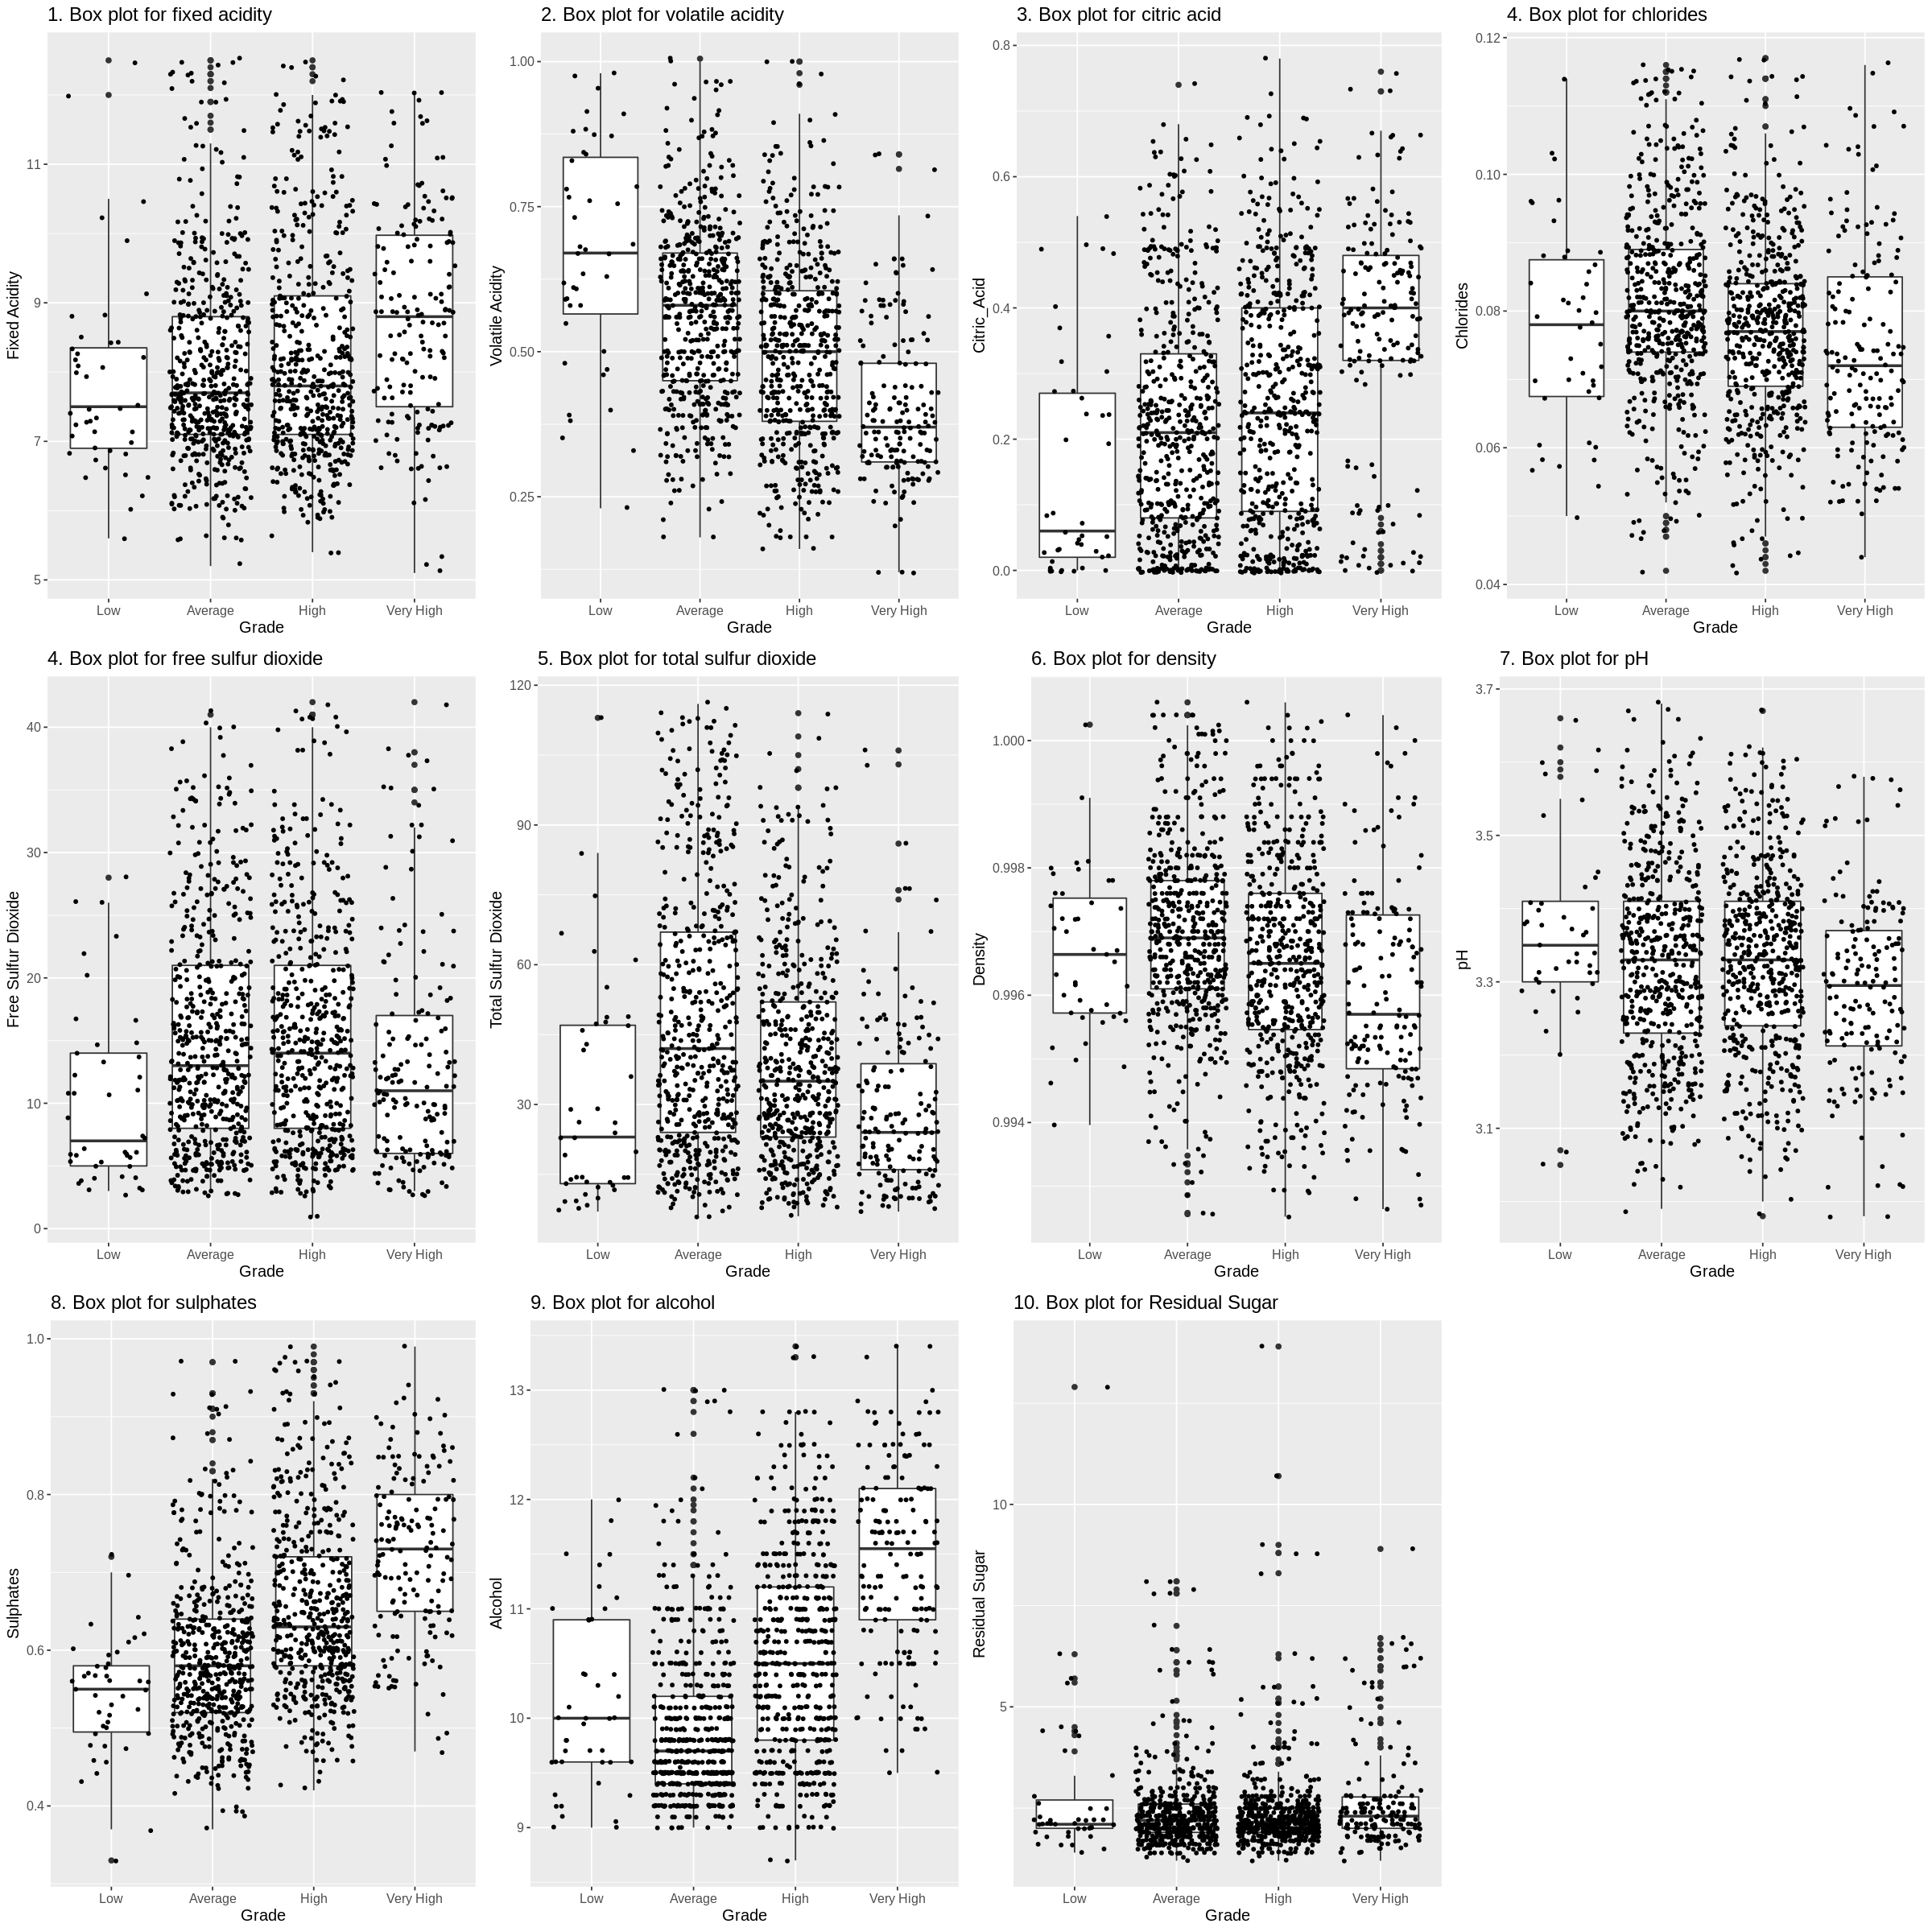

In [6]:
options(repr.plot.height = 20, repr.plot.width = 20)

# Arranging the boxplots from low to very high
clean_wine_dataset <- factor(no_outliers_updated$Grade , levels = c("Low", "Average", "High", "Very High"))

#boxplot for fixed acidity
boxplot_fixed_acidity <- no_outliers_updated |>
                         ggplot(aes(x = clean_wine_dataset, y = fixed_acidity)) +
                         geom_boxplot () +
                         geom_jitter(size = 1) +
                         labs(x = "Grade", y = "Fixed Acidity") +
                         theme(text = element_text(size = 12)) +
                         ggtitle("1. Box plot for fixed acidity")

#boxplot for volatile acidity
boxplot_volatile_acidity <- no_outliers_updated |>
                            ggplot(aes(x = clean_wine_dataset, y = volatile_acidity)) +
                            geom_boxplot () +
                            geom_jitter(size = 1) +
                            labs(x = "Grade", y = "Volatile Acidity") +
                            theme(text = element_text(size = 12)) +
                            ggtitle("2. Box plot for volatile acidity")


#boxplot for citric acid
boxplot_citric_acid <- no_outliers_updated |>
                       ggplot(aes(x = clean_wine_dataset, y = citric_acid)) +
                       geom_boxplot () +
                       geom_jitter(size = 1) +
                       labs(x = "Grade", y = "Citric_Acid") +
                       theme(text = element_text(size = 12)) +
                       ggtitle("3. Box plot for citric acid")

#boxplot for chlorides
boxplot_chlorides <- no_outliers_updated |>
                     ggplot(aes(x = clean_wine_dataset, y = chlorides)) +
                     geom_boxplot () +
                     geom_jitter(size = 1) +
                     labs(x = "Grade", y = "Chlorides") +
                     theme(text = element_text(size = 12)) +
                     ggtitle("4. Box plot for chlorides")

#boxplot for free sulfur dioxide
boxplot_free_sulfur_dioxide <- no_outliers_updated |>
                               ggplot(aes(x = clean_wine_dataset, y = free_sulfur_dioxide)) +
                               geom_boxplot() +
                               geom_jitter(size = 1) +
                               labs(x = "Grade", y = "Free Sulfur Dioxide") +
                               theme(text = element_text(size = 12)) +
                               ggtitle("4. Box plot for free sulfur dioxide")

                            

#boxplot for total sulfur dioxide
boxplot_total_sulfur_dioxide <- no_outliers_updated |>
                                ggplot(aes(x = clean_wine_dataset, y = total_sulfur_dioxide)) +
                                geom_boxplot ()+
                                geom_jitter(size = 1) +
                                labs(x = "Grade", y = "Total Sulfur Dioxide") +
                                theme(text = element_text(size = 12)) +
                                ggtitle("5. Box plot for total sulfur dioxide")
 

#boxplot for density
boxplot_density <- no_outliers_updated |>
                   ggplot(aes(x = clean_wine_dataset, y = density)) +
                   geom_boxplot ()+
                   geom_jitter(size = 1) +
                   labs(x = "Grade", y = "Density") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("6. Box plot for density")

#boxplot for pH
boxplot_pH <- no_outliers_updated |>
              ggplot(aes(x = clean_wine_dataset, y = pH)) +
              geom_boxplot ()+
              geom_jitter(size = 1) +
              labs(x = "Grade", y = "pH") +
              theme(text = element_text(size = 12)) +
              ggtitle("7. Box plot for pH")

#boxplot for sulphates
boxplot_sulphates <- no_outliers_updated |>
                     ggplot(aes(x = clean_wine_dataset, y = sulphates)) +
                     geom_boxplot () +
                     geom_jitter(size = 1) +
                     labs(x = "Grade", y = "Sulphates") +
                     theme(text = element_text(size = 12)) +
                     ggtitle("8. Box plot for sulphates")


#boxplot for alcohol
boxplot_alcohol <- no_outliers_updated |>
                   ggplot(aes(x = clean_wine_dataset, y = alcohol)) +
                   geom_boxplot () +
                   geom_jitter(size = 1) +
                   labs(x = "Grade", y = "Alcohol") +
                   theme(text = element_text(size = 12)) +
                   ggtitle("9. Box plot for alcohol")

#boxplot for residual sugar
boxplot_residual_sugar <- no_outliers_updated |>
                          ggplot(aes(x = clean_wine_dataset, y = residual_sugar)) +
                          geom_boxplot() +
                          geom_jitter(size = 1) +
                          labs(x = "Grade", y = "Residual Sugar") +
                          theme(text = element_text(size = 12)) +
                          ggtitle("10. Box plot for Residual Sugar")

#Let's place our boxplots side by side so that it is easier to compare and find the ones with the most correlation
grid.arrange(boxplot_fixed_acidity,boxplot_volatile_acidity,boxplot_citric_acid,
             boxplot_chlorides,boxplot_free_sulfur_dioxide,boxplot_total_sulfur_dioxide,
             boxplot_density,boxplot_pH,boxplot_sulphates,boxplot_alcohol,boxplot_residual_sugar, ncol = 4)
                         

With the boxplots above, we can conclude that variables such as Citric Acid, Volatile Acid, Sulphates and Alcohol have correlation with Grade. However, we are still planning to utilize forward selecion to finalize our selection of predictors.

#### Splitting into Training and Testing Datasets

Our initial step is to set the seed for our data to be reproducible. In addition, we will use the inital_split function to split our clean data set into 75% for training data and 25% for our testing dataset. wine_train is our training data and wine_test is our testing data.

In [7]:
set.seed(1000)
wine_split <- initial_split(no_outliers_updated, prop = 0.75, strata = Grade)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)


#### Cross Validation

Next, we apply cross validation onto our training data and split it into 5 evenly distributed subsets. We then apply stratification to avoid an imbalance of our target variable in the subsets, ultimately decreasing biased datasets.

In [8]:
wine_vfold <- vfold_cv(wine_train, v = 5, strata = Grade)

### Forward Selection

We use Forward Selection to see which of our predictors give the best accuracy estimate to predict our target variable.

In [9]:
names <- colnames(wine_train |> select(-Grade))

example_formula <- paste("Grade", "~", paste(names, collapse="+"))
example_formula


# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")


# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Grade", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        wine_recipe <- recipe(as.formula(model_string), 
                                data = wine_train) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(wine_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = wine_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}


accuracy <- accuracies |>
            arrange(desc(accuracy)) |>
            slice(1)       
accuracy

[1] "Grade ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol"

size,model_string,accuracy
<int>,<chr>,<dbl>
5,Grade ~ alcohol+citric_acid+pH+residual_sugar+fixed_acidity,0.6290929


Table 4: Forward Selection results

Great! The results show that the best accuracy estimate is using Grade ~ alcohol, citric acid, pH, residual sugar and fixed acidity. Thus, let's create a classification model to predict the accuracy using these predictors we found.

#### Creating the Classification Model

Now, let's create a classification model using these variables. We shall first create a model specification and set neighbors as tune() to find the best number of neighbors that gives the best accuracy estimate. After that, we shall create a recipe using  all the predictor variables that have a correlation towards Grade from the visualization above. We shall also step and center our data to standardize it.

In [10]:
wine_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

wine_recipe <- recipe(Grade ~ citric_acid + fixed_acidity + residual_sugar + alcohol + pH, data = wine_train) |>
               step_scale(all_predictors()) |>
               step_center(all_predictors())

#### Finding the Best Neighbours

Next, we use workflow to combine the recipe and model specification. Furthermore, we use tune_grid() to fit the model for each value in a range of parameter values and then we set the grid as 100 as we shall use 100 $K$ values for this model. We then aggregate the mean and standard error using the collect_metrics() function. We then filtered everything except the accuracy. We are also arrange accuracy from highest to lowest mean. Then, we slice the top row and found which neighbour gives the best accuracy. In this case, 1 neighbours. 

In [11]:
wine_fit <- workflow() |>
            add_recipe(wine_recipe) |>
            add_model(wine_spec) |>
            tune_grid(resamples = wine_vfold, grid = 100) |>
            collect_metrics() |>
            filter(.metric == "accuracy") |>
            arrange(desc(mean)) |>
            slice(1) |>
            pull(neighbors)

wine_fit

[1] 1

#### Creating a New Model Specification

Now, we set the neighbours as 1 in our new model specification as determined from above and now we shall create another recipe.

In [12]:
wine_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
                  set_engine("kknn") |>
                  set_mode("classification")

wine_recipe_test <- recipe(Grade ~ citric_acid + fixed_acidity + residual_sugar + alcohol + pH, data = wine_train) |>
                    step_scale(all_predictors()) |> 
                    step_center(all_predictors())

#### Utilizing Workflow and Fitting

We use workflow again to combine the new model specification and recipe and then we fitted our training data.

In [13]:
wine_fit_test <- workflow() |>
                 add_recipe(wine_recipe_test) |>
                 add_model(wine_spec_test) |>
                 fit(data = wine_train)

#### Predicting our Accuracy

Finally, we use our classification model to predict on our Grade on the testing data with predict(). We then bind the column of predictions to our original testing dataset using bind_cols(). Finally, we use metrics() to compute the accuracy.

In [14]:
wine_predict <- wine_fit_test |>
                predict(wine_test) |>
                bind_cols(wine_test) |>
                metrics(truth = Grade, estimate = .pred_class)
wine_predict

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6656151
kap,multiclass,0.4791680


Table 5: Accuracy Table

In [15]:
wine_accuracy <- wine_predict |>
                 filter(.metric == "accuracy") |>
                 pull(.estimate)
wine_accuracy

[1] 0.6656151

The accuracy of our predicted model was found to be 67%. Despite this number being a bit higher than the accuracy estimate, it is less than we initially had hoped. Thus, this result can be justified by understanding that the quality of wine is likely a multi-dimensional construct, with other factors that could very well be more significant than chemical composition (Charters & Pettigrew, 2007). Connoisseurs are trained to taste wine, yet quality can be conceived in varying ways depending on personal preference and the dimensions on which they focus. Although our results show that a relationship does exist, which supports our original hypothesis, we still cannot expect the relationship between physicochemical properties and quality to have a strong significant correlation.


### Making a Confusion Matrix

We are making a confusion matrix to observe how many points we predicted right and wrong.

In [16]:
wine_conf_mat <- wine_fit_test |>
                predict(wine_test) |>
                bind_cols(wine_test) |>
                conf_mat(truth = Grade, estimate = .pred_class)
wine_conf_mat

           Truth
Prediction  Average High Very High Low
  Average        99   27         3   3
  High           26   82        10   2
  Very High       4   20        28   2
  Low             6    3         0   2

Table 6: Confusion Matrix

### Making a New Column for Correct Predictions

We are making a new column for correct and incorrect predictions so that we can show the accuracy of our predictions in our final visualizations.

In [17]:
wine_conf <- wine_fit_test |>
                predict(wine_test) |>
                bind_cols(wine_test)

wine_end <- wine_conf |>
    mutate(is_correct = case_when(
        .pred_class == Grade ~ "Correct",
        TRUE ~ "Incorrect"
    ))
wine_end

.pred_class,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grade,is_correct
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Average,7.3,0.980,0.05,2.1,0.061,20,49,0.99705,3.31,0.55,9.7,Low,Incorrect
Very High,7.1,0.875,0.05,5.7,0.082,3,14,0.99808,3.40,0.52,10.2,Low,Incorrect
High,7.5,0.685,0.07,2.5,0.058,5,9,0.99632,3.38,0.55,10.9,Low,Incorrect
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
High,11.3,0.62,0.67,5.2,0.086,6,19,0.99880,3.22,0.69,13.4,Very High,Incorrect
High,9.4,0.30,0.56,2.8,0.080,6,17,0.99640,3.15,0.92,11.7,Very High,Incorrect
Very High,9.1,0.40,0.50,1.8,0.071,7,16,0.99462,3.21,0.69,12.5,Very High,Correct


#### Checking if the is_correct column is consistent with our confusion Matrix

In [18]:
wine_end %>%
    count(.pred_class, Grade, is_correct) %>%
    print(n = 15)

# A tibble: 15 × 4
   .pred_class Grade     is_correct     n
   <fct>       <fct>     <chr>      <int>
 1 Average     Average   Correct       99
 2 Average     High      Incorrect     27
 3 Average     Very High Incorrect      3
 4 Average     Low       Incorrect      3
 5 High        Average   Incorrect     26
 6 High        High      Correct       82
 7 High        Very High Incorrect     10
 8 High        Low       Incorrect      2
 9 Very High   Average   Incorrect      4
10 Very High   High      Incorrect     20
11 Very High   Very High Correct       28
12 Very High   Low       Incorrect      2
13 Low         Average   Incorrect      6
14 Low         High      Incorrect      3
15 Low         Low       Correct        2


Table 7: Is_correct results

Great! It is the same.

### Visualization       
For our data visualization, we can now use our predictors and plot scatterplots to see which predictors has the highest number of correct or incorrect predictions. We are showing how many points are predicted correctly based on the predictors.

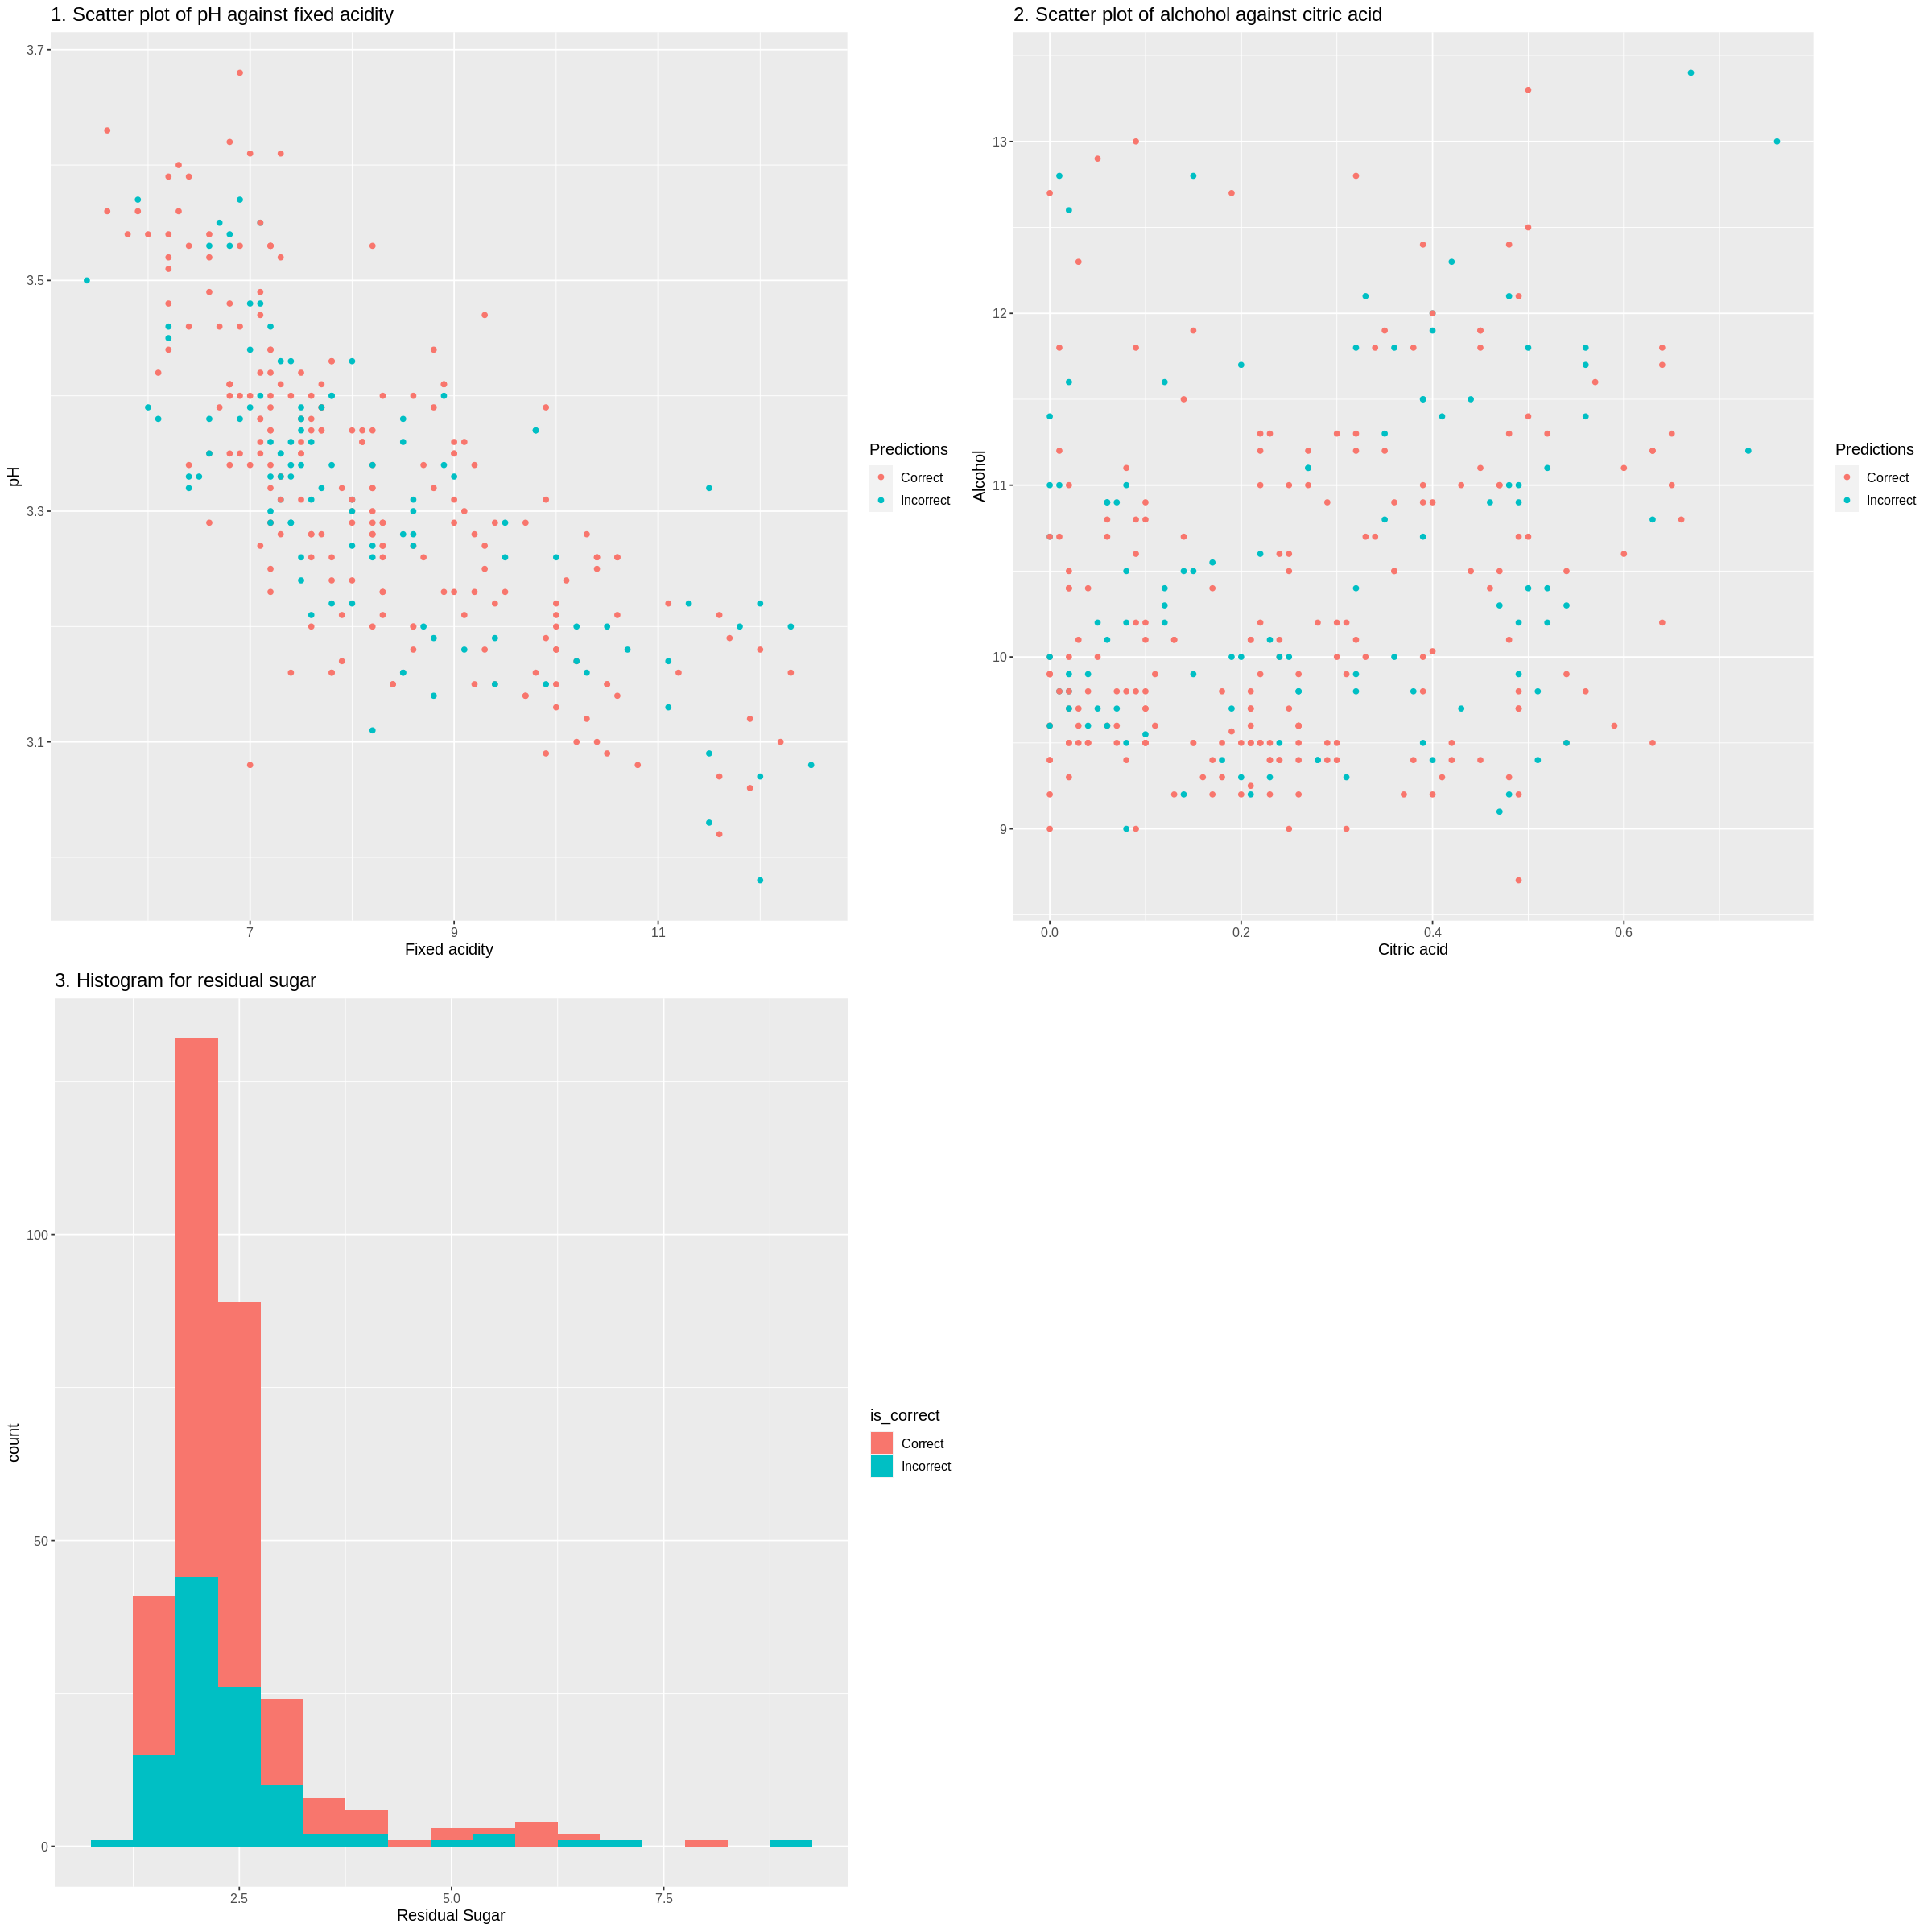

In [19]:
options(repr.plot.height = 20, repr.plot.width = 20)

#scatter plot of fixed acidity and pH
scatterplot_1 <- wine_end |>
                            ggplot(aes(x = fixed_acidity, y = pH, color = is_correct)) +
                            geom_point() +
                            labs(x = "Fixed acidity", y = "pH", color = "Predictions") +
                            theme(text = element_text(size = 12)) +
                            ggtitle("1. Scatter plot of pH against fixed acidity")

#boxplot for alcohol and citric acid
scatterplot_2 <- wine_end |>
                       ggplot(aes(x = citric_acid, y = alcohol, color = is_correct)) +
                       geom_point() +
                       labs(x = "Citric acid", y = "Alcohol", color = "Predictions") +
                       theme(text = element_text(size = 12)) +
                       ggtitle("2. Scatter plot of alchohol against citric acid")

#histogram for residual sugar
histogram <- wine_end |>
                     ggplot(aes(x = residual_sugar, fill = is_correct)) +
                     geom_histogram(binwidth = 0.5) +
                     labs(x="Residual Sugar", color = "Predictions") +
                     theme(text = element_text(size = 12)) +
                     ggtitle("3. Histogram for residual sugar") 

grid.arrange(scatterplot_1,scatterplot_2, histogram, ncol = 2)

## Visualization Analysis
From our visualizations, we can further analyze the relationship between our predictors and the Grade and draw more meaningful conclusions. 

* We can see that for when Fixed Acidity is against pH, we cannot really tell if most of it is correct or not. This goes well with our accuracy from our model which is 67%.

* From our second visualization, we can see that wth Citric Acid and Alcohol, we again cannot really tell if most of it is correct or not. This goes well with our accuracy from our model which is 67%.

* Our last visualization, we were left with one predictor, residual sugar, for which we used a histogram. It has a right skewed shape and from the predictions, we can observe that it mostly contains correct predictions which means it is a good predictor.

## Expected outcomes and significance:

### Summary of what we found

We analyzed relationships between the physiochemical properties of red wine with Grade. For instance, that for when Fixed Acidity is against pH, we cannot really tell if most of it is correct or not. Using citric_acid, fixed_acidity, residual_sugar, alcohol and pH as our predictors, we attempted to create a model that could predict the grade, or quality, of wine. The result of this produced a model with an accuracy of 67%. This result is not high enough to indicate a significant relationship between physicochemical properties and grade, however the existing correlation can still be considered.  

### What do you expect to find?

Chemical properties of a substance can have an effect on taste. For example, a sour taste in foods is influenced by pH and acids present (Da Conceicao Neta, et al., 2007). Knowing this, we expected the accuracy to be slightly higher because we expected physicochemical properties to impact taste, and thus also affect quality as taste is a factor in the human aspect of wine tasting.

 ### What impact could such findings have?

The findings of our project aids in wine production where wineries can explore specific physicochemical properties of wine that play a larger role in affecting the quality of the wine produced. Thus, wineries can refine their production process to produce better quality wines. 

### What future questions could this lead to?

Future studies should explore whether other types of wines share the same dependence of  citric acid, fixed acidity, residual sugar, alcohol and pH on the quality of wine. Secondly, studies can address the influence aging of wine plays in the correlation of citric acid, fixed acidity, residual sugar, alcohol and pH on the quality of wine. 

## Bibliography

* Charters, S., & Pettigrew, S. (2007). The dimensions of wine quality. Food Quality and Preference, 18(7), 997-1007. https://doi.org/10.1016/j.foodqual.2007.04.003

*  Da Conceicao Neta, E. R., Johanningsmeier, S. D., Drake, M. A., & McFeeters, R. F. (2007). A chemical basis for sour taste perception of acid solutions and fresh-pack dill pickles. Journal of food science, 72(6), S352–S359. https://doi.org/10.1111/j.1750-3841.2007.00400.x
 
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



